In [1]:
import linear_hypostomatous_model as lhm
import matplotlib.pylab as pl
from tqdm import tqdm 
import pandas as pd 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
from matplotlib.pyplot import get_cmap
from matplotlib.colors import LogNorm

def generate_colors(colormap_name, N):
    cmap = get_cmap(colormap_name)
    return [cmap(i / (N - 1)) for i in range(N)]

def hex2rgb(hex):
    rbg = tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))
    return tuple([c/255 for c in rbg])


mpl.rcParams['mathtext.fontset'] = 'stix'  # or 'dejavusans', 'cm', 'custom'
mpl.rcParams['font.family'] = 'STIXGeneral'  # Matches STIX math font
fontsize = 12
# set tick font size
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize

174 11 11


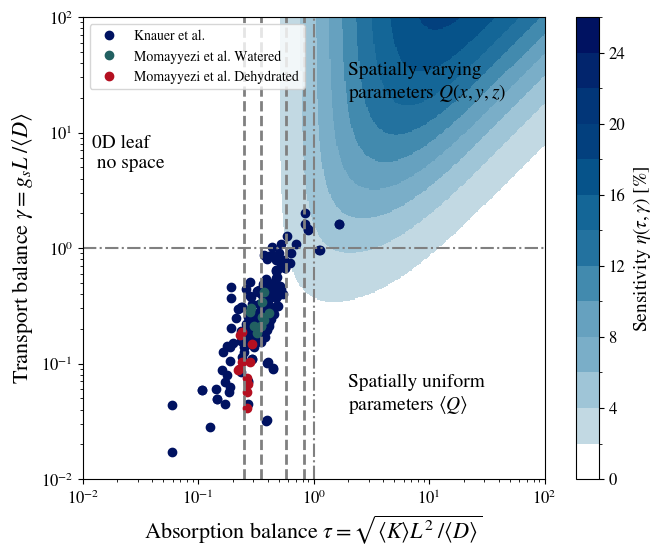

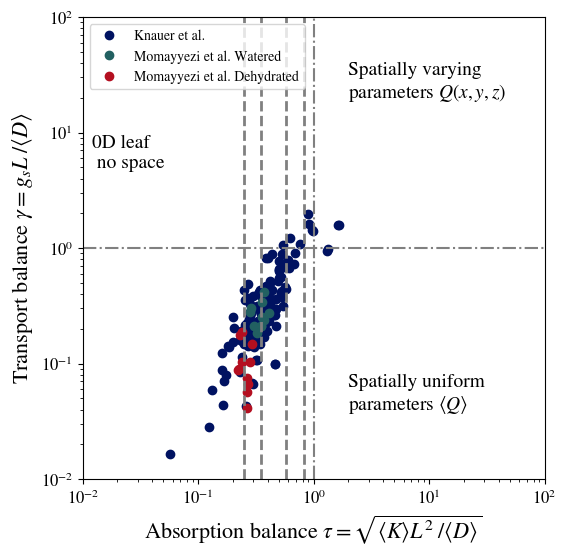

In [13]:
# Setting up plotting functionality
import scicolor

def my_cmap(min, max, res):
    colors = ['#001261',
 '#02236C',
 '#023376',
 '#034481',
 '#06568C',
 '#156798',
 '#307DA6',
 '#4E92B4',
 '#71A8C4',
 '#94BED2',
 '#B3D1DF',
 '#D5E3E9'] #scicolor.get_cmap('oslo25').colors
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', colors, N=21).reversed()
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # ['#C9DDE7', '#EACEBD', '#D39774', '#BE6533','#8B2706']#
    # force the first color entry to be 
    cmaplist[0] = 'white'   #'white'
    # cmaplist[1] = 'white'   #'white'
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)

    # define the bins and normalize
    bounds = np.linspace(min, max, res)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    return cmap, norm

sensitivity = 100*np.loadtxt('data/sensitivities.txt', delimiter=';', skiprows=1)
N = len(sensitivity)
taus   = np.exp(np.linspace(np.log(0.01), np.log(100), N))
gammas = np.exp(np.linspace(np.log(0.01), np.log(100), N))
bounds = (0, 26, 14)

# FULL PLOT

fig = plt.figure(figsize=(8,6))
cmap, norm = my_cmap(*bounds)
im = plt.pcolor(taus, gammas, sensitivity, shading='nearest', cmap=cmap, norm=norm)
cbar = plt.colorbar(im)
#
# load dfKnauer and dfMomayyezi to plot the data points
dfKnauer = pd.read_csv('data/Knauer2022_all_hypostomatous.csv', sep=';', decimal=',') 
dfMomayyeziW = pd.read_csv('data/Momayyezi_watered.csv')
dfMomayyeziDH = pd.read_csv('data/Momayyezi_dehydrated.csv')

point_colors = [hex2rgb('001261'), hex2rgb('226061'), hex2rgb('B40F20')]

print(len(dfKnauer.index.to_list()), len(dfMomayyeziDH.index.to_list()), len(dfMomayyeziW.index.to_list()))

# plot data points 
for df, color, label in zip([dfKnauer, dfMomayyeziW, dfMomayyeziDH], point_colors, ['Knauer et al.', 'Momayyezi et al. Watered', 'Momayyezi et al. Dehydrated']):
    plt.plot(df['tau'], df['gamma'], 'o', color=color, label=label)
    # plt.errorbar(df['tau'], df['gamma'], xerr=[df['dtau_low'], df['dtau_high']], yerr=[df['dgamma_low'], df['dgamma_high']], fmt='o', color=color, label=label, alpha=0.4)

lines = [0.248, 0.352, 0.570, 0.824] #1%, 2%, 5%, 10% relative error
for line in lines:
    plt.vlines(line, 0.01, 100, color='grey', linestyle='--', linewidth=2)

#  
plt.text(0.012, 5, '0D leaf \n no space', fontsize=14, color='black')
plt.text(2, 0.04, 'Spatially uniform \nparameters '+r'$\langle Q \rangle$', fontsize=14, color='black')
plt.text(2, 20, 'Spatially varying \nparameters '+r'$Q(x,y,z)$', fontsize=14, color='black')
# plt.plot(10, 10, 'ko')
#
cbar.set_label(r'Sensitivity $\eta(\tau, \gamma)$ [%]', fontsize=14)
plt.xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 \; / \langle D\rangle}$', fontsize=16)
plt.ylabel(r'Transport balance $\gamma = g_s L \; / \langle D \rangle$', fontsize=16)
# plt.title(title, fontsize=18)
plt.hlines(1, 0.01, 100, color='grey', linestyle='-.')
plt.vlines(1, 0.01, 100, color='grey', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01, 100)
plt.ylim(0.01, 100)
plt.legend(loc='upper left')
plt.gca().set_aspect('equal')
plt.savefig(f'figs/3C_sensitivity.svg')
plt.show()

# PLOT WITHOUT HEATMAP

fig = plt.figure(figsize=(8,6))

# load dfKnauer and dfMomayyezi to plot the data points
dfKnauer = pd.read_csv('data/dfKnauer_cstar.csv') # use: pd.read_csv('data/dfKnauer.csv') for gm=gm* estimates
dfMomayyeziW = pd.read_csv('data/Momayyezi_watered.csv')
dfMomayyeziDH = pd.read_csv('data/Momayyezi_dehydrated.csv')

point_colors = [hex2rgb('001261'), hex2rgb('226061'), hex2rgb('B40F20')]

# plot data points 
for df, color, label in zip([dfKnauer, dfMomayyeziW, dfMomayyeziDH], point_colors, ['Knauer et al.', 'Momayyezi et al. Watered', 'Momayyezi et al. Dehydrated']):
    plt.plot(df['tau'], df['gamma'], 'o', color=color, label=label)
    # plt.errorbar(df['tau'], df['gamma'], xerr=[df['dtau_low'], df['dtau_high']], yerr=[df['dgamma_low'], df['dgamma_high']], fmt='o', color=color, label=label, alpha=0.4)

lines = [0.248, 0.352, 0.570, 0.824] #1%, 2%, 5%, 10% relative error
for line in lines:
    plt.vlines(line, 0.01, 100, color='grey', linestyle='--', linewidth=2)

#  
plt.text(0.012, 5, '0D leaf \n no space', fontsize=14, color='black')
plt.text(2, 0.04, 'Spatially uniform \nparameters '+r'$\langle Q \rangle$', fontsize=14, color='black')
plt.text(2, 20, 'Spatially varying \nparameters '+r'$Q(x,y,z)$', fontsize=14, color='black')
# plt.plot(10, 10, 'ko')
#
plt.xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 \; / \langle D\rangle}$', fontsize=16)
plt.ylabel(r'Transport balance $\gamma = g_s L \; / \langle D \rangle$', fontsize=16)
# plt.title(title, fontsize=18)
plt.hlines(1, 0.01, 100, color='grey', linestyle='-.')
plt.vlines(1, 0.01, 100, color='grey', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01, 100)
plt.ylim(0.01, 100)
plt.legend(loc='upper left')
plt.gca().set_aspect('equal')
plt.savefig(f'figs/3C_sensitivity_empty.svg')
plt.show()

### Generate a histogram of the $A_N$ distribution illustrating how $\eta$ is chosen

MF solution has draw-down of 0.367


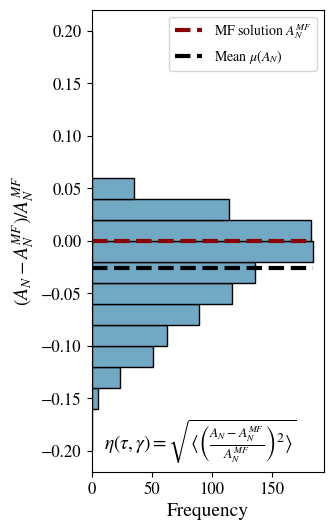

mean: -0.026, std: 0.052


In [12]:

tau, gamma, zeta_ = 1.65, 2.02, 0.15
n = 10
delta_min, kappa_min, lambda_min = 0.2, 0.2, 0.2

leaf = lhm.Leaf(tau, gamma, zeta_, rho=(1,1,0.5), resolution=100)
domain, mf_solution = leaf.calculate_steady_state_solution()
mf_dd = 1 - mf_solution[0]
print(f"MF solution has draw-down of {mf_dd:.3f}") 

rho_deltas  = np.linspace(delta_min, 1, n)
rho_kappas  = np.linspace(kappa_min, 1, n)
rho_lambdas = np.linspace(lambda_min, 1-lambda_min, n)

drawdown = np.zeros(n**3)
index = 0
for k in range(n):
    for l in range(n):
        for m in range(n):
            rho = (rho_deltas[k], rho_kappas[l], rho_lambdas[m])
            leaf.rho = rho
            domain, solution = leaf.calculate_steady_state_solution()
            drawdown[index] = 1 - solution[0]
            index += 1

mean = np.mean(drawdown)
std = np.std(drawdown)


fig, ax = plt.subplots(figsize=(3,6))

bins = 20
xmax, xmin = 0.20, -0.20
counts = ax.hist((drawdown-mf_dd)/mf_dd, bins=bins, range=(xmin, xmax), orientation='horizontal', align='mid', color=hex2rgb('71A8C4'), edgecolor='black')
height = np.max(counts[0])
ax.plot([0, height], [0, 0], color='darkred', linestyle='--', linewidth=3, label=r'MF solution $A_N^{MF}$')
ax.plot([0, height], [(mean-mf_dd)/mf_dd, (mean-mf_dd)/mf_dd], 'k--', linewidth=3, label=r'Mean $\mu(A_N)$')
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('($A_N - A_N^{MF}$)/$A_N^{MF}$', fontsize=14) 
ax.text(10, -0.20, r'$\eta(\tau, \gamma) = \sqrt{\langle \left( \frac{A_N - A_N^{MF}}{A_N^{MF}} \right)^2 \rangle}$', fontsize=14)
# ax.set_ylabel('Draw-down', fontsize=14)
ax.legend()
plt.savefig('figs/3B_distribution.svg')
plt.show()

print(f'mean: {(mean-mf_dd)/mf_dd:.3f}, std: {np.sqrt(np.mean((drawdown-mf_dd)**2/mf_dd**2)):.3f}')  


### Generate a 3-col figure of varying different structural parameters $\rho$

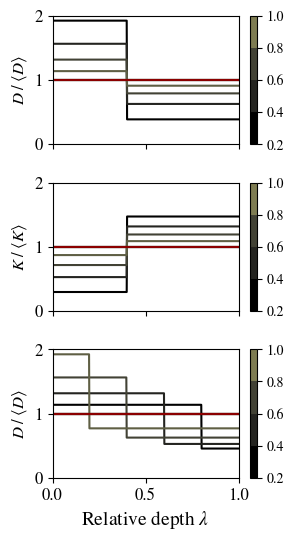

In [19]:

def kappa_delta(rho_delta, rho_kappa, rho_lambda, resolution=500):
    domain = np.linspace(0, 1, resolution)
    deltas = np.zeros(resolution)
    kappas = np.zeros(resolution)
    # finding percentage volumes occupied by the different comparments
    boundary = int(resolution*(1-rho_lambda))
    # calculate dimensionless scalars
    delta_sm = 1/((1-rho_lambda) + rho_lambda*rho_delta)
    delta_pm = rho_delta*delta_sm
    #
    kappa_pm = 1/((1-rho_lambda)*rho_kappa + rho_lambda)
    kappa_sm = rho_kappa*kappa_pm
    # fill in arrays
    deltas[:boundary] = delta_sm
    deltas[boundary:] = delta_pm
    #
    kappas[:boundary] = kappa_sm 
    kappas[boundary:] = kappa_pm
    return domain, deltas, kappas
    


fig, axs = plt.subplots(3, 1, figsize=(3,6), sharex=True, sharey=True)
axs = axs.flatten()
lines = 4
rhos = np.linspace(0.2, 0.8, lines)

# THESE CHOICES ARE CONSISTENT WITH THE SENSITIVITY SEARCH AND An HISTOGRAM
vary_delta = np.ones((lines, 3))
vary_delta[:,0] = rhos
vary_delta[:,2] = 0.6

vary_kappa = np.ones((lines, 3))
vary_kappa[:,1] = rhos
vary_kappa[:,2] = 0.6

vary_lambda = np.ones((lines, 3))
vary_lambda[:,0] = 0.4
vary_lambda[:,1] = 1
vary_lambda[:,2] = rhos

variations = [vary_delta, vary_kappa, vary_lambda]
ylabels = [r'$D \;/\; \langle D\rangle$', r'$K \;/\; \langle K\rangle$', r'$D \;/\; \langle D\rangle$']

##colors = ['#001261', '#023376','#06568C', '#307DA6', '#71A8C4']
colors = ['#000000',
 '#242420',
 '#424235',
 '#5F5F44',
 '#7E7C52']

from matplotlib.colors import BoundaryNorm, ListedColormap



for ax, variation, ylabel in zip(axs, variations, ylabels):
    for rho, color in zip(variation, colors):
        domain, deltas, kappas = kappa_delta(*rho)
        ax.plot(domain, deltas, color=color)
        ax.plot(domain, kappas, color=color)
    ax.plot(domain, np.ones_like(domain), color='darkred', linestyle='-', linewidth=1.5)
    ax.set_ylabel(ylabel, fontsize=12)
axs[2].set_xlabel(r'Relative depth $\lambda$', fontsize=14)


for ax in axs:
    bounds = np.linspace(0.2, 1, lines+1)
    # Create a discrete colormap using the same colors as used for the lines
    discrete_cmap = ListedColormap(colors)
    # Create a norm that maps values to the correct color bin
    norm = BoundaryNorm(bounds, discrete_cmap.N)
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=discrete_cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.05, boundaries=bounds, ticks=bounds)
    #cbar.set_label(r'$\tau$ values', fontsize=fontsize, labelpad=1)
    cbar.ax.tick_params(labelsize=10)

domain, deltas, kappas = kappa_delta(1, 1, 0.5)
axs[2].plot(domain, deltas, color='darkred', label=r'Typical profile')

plt.subplots_adjust(hspace=0.3)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.savefig('figs/3A_contrast_profiles.svg')

plt.show()


array([0.2, 0.4, 0.6, 0.8])